<a href="https://colab.research.google.com/github/ami29839/slo2k21/blob/main/UTS_AryaMaulanaI_2101202079.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [268]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [269]:
cd /content/drive/MyDrive/Colab

/content/drive/MyDrive/Colab


In [270]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [271]:
print("(INFO) loading images...")
imagePaths=paths.list_images("3scene")
data=[]
labels=[]

(INFO) loading images...


In [272]:
for imagePath in imagePaths:
  image=Image.open(imagePath)
  image=np.array(image.resize((128,128))) / 255.0
  data.append(image)
  label=imagePath.split(os.path.sep)[-2]
  labels.append(label)

In [273]:
print(labels)

['coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 

In [274]:
lb=LabelBinarizer()
labels=lb.fit_transform(labels)

In [275]:
print(labels)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [0 1 0]
 [0 1 0]
 [0 1 0]]


In [276]:
print(np.array(data).shape)

(948, 128, 128, 3)


In [277]:
(trainX, testX, trainY, testY)=train_test_split(np.array(data), np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(711, 128, 128, 3)
(237, 128, 128, 3)


In [278]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense, Dropout
model=Sequential(
    [
     Flatten(input_shape=(128*128*3,)),
     Dense(1024, activation="relu"),
     Dense(512, activation="relu"),
     Dense(256, activation="relu"),
     Dense(128, activation="relu"),
     #Dropout(0.25),
     Dense(64, activation="relu"),
     Dense(32, activation="relu"),
     Dense(16, activation="relu"),
     Dense(8, activation="relu"),
     #Dense(4, activation="relu"),
     Dense(3, activation="softmax"),
    ]
)

In [279]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 49152)             0         
_________________________________________________________________
dense_56 (Dense)             (None, 1024)              50332672  
_________________________________________________________________
dense_57 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_58 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_59 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_60 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_61 (Dense)             (None, 32)              

In [280]:
print("(INFO) training network.....")
opt = Adam(lr=1e-3, decay=1e-3 )
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=300)

(INFO) training network.....
Epoch 1/100
3/3 [==============================] - 1s 230ms/step - loss: 3.0802 - accuracy: 0.3297 - val_loss: 1.1429 - val_accuracy: 0.2827
Epoch 2/100
3/3 [==============================] - 0s 120ms/step - loss: 2.1310 - accuracy: 0.2956 - val_loss: 6.6224 - val_accuracy: 0.2827
Epoch 3/100
3/3 [==============================] - 0s 111ms/step - loss: 8.1253 - accuracy: 0.2961 - val_loss: 3.7727 - val_accuracy: 0.2827
Epoch 4/100
3/3 [==============================] - 0s 115ms/step - loss: 3.6413 - accuracy: 0.3288 - val_loss: 5.8089 - val_accuracy: 0.3924
Epoch 5/100
3/3 [==============================] - 0s 105ms/step - loss: 5.2542 - accuracy: 0.3570 - val_loss: 1.1644 - val_accuracy: 0.5063
Epoch 6/100
3/3 [==============================] - 0s 90ms/step - loss: 1.6583 - accuracy: 0.4165 - val_loss: 1.2021 - val_accuracy: 0.3966
Epoch 7/100
3/3 [==============================] - 0s 97ms/step - loss: 1.2515 - accuracy: 0.3714 - val_loss: 1.0734 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


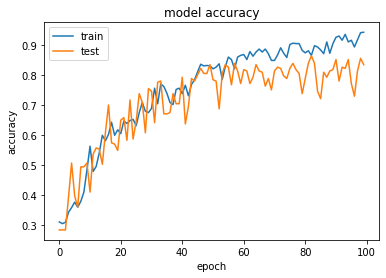

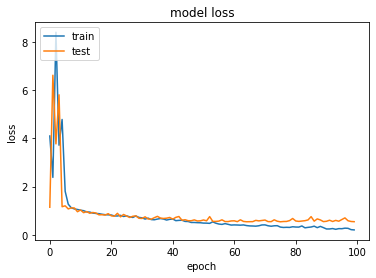

In [281]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()